# Velly Shishoka Movie Recommendation System
 - Movie Recommendation System

---

### Predict Overview: Movie Recommendation Challenge 2022

### Introduction

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, we as EDSA students have constructucted a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

The evaluation metric for this model is Root Mean Square Error. Root Mean Square Error (RMSE) is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process. For our task of generating user movie ratings via recommendation algorithms.

### Data Description
This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

**Source:**

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB.

**Supplied Files:**
* genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
* genome_tags.csv - user assigned tags for genome-related scores
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

**Additional Information:**

The below information is provided directly from the MovieLens dataset description files:

#### Ratings Data File Structure (train.csv)

* All ratings are contained in the file train.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:
userId,movieId,rating,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

* Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

* Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

#### Tags Data File Structure (tags.csv)

* All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:
userId,movieId,tag,timestamp
* The lines within this file are ordered first by userId, then, within user, by movieId.
* Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

* Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

#### Movies Data File Structure (movies.csv)

* Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:
movieId,title,genres
Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

* Genres are a pipe-separated list, and are selected from the following:
Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
(no genres listed)

#### Links Data File Structure (links.csv)

Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

* movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.

* imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

* tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

#### Tag Genome (genome-scores.csv and genome-tags.csv)

* As described in this article, the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

* The genome is split into two files. The file genome-scores.csv contains movie-tag relevance data in the following format:

* The second file, genome-tags.csv, provides the tag descriptions for the tag IDs in the genome file, in the following format:
tagId,tag


<a id="cont"></a>

## Table of Contents

<a href=#Zero>0. Importing Packages</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#five>4. Modeling</a>

<a href=#six>5. Model Performance</a>

<a href=#seven>6. Model Explanations</a>

<a href=#cont>Back to Table of Contents</a>

In [66]:
!pip install comet_ml
!pip3 install comet_ml

In [168]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="hJzfctm54CcFkkTLI0fHiyCgc",
    project_name="gm6",
    workspace="lehonga",
)

# Run your code and go to /

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\Lehon\\Downloads\\edsa-movie-recommendation-2022 (1)' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.com/lehonga/gm6/f835837025a0424190316886ef63cc6f



 <a id="one"></a>
## 1. Importing Packages 

In [68]:
# Libraries for data loading, data manipulation and data visualisation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import pickle
# Packages for visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)
# Data Preprocessing
import random
from time import time
import cufflinks as cf
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
import matplotlib.cm as cm
import matplotlib as mpl
from scipy.sparse import csr_matrix
import itertools

# Models building
from surprise import Reader, Dataset 
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# import dataset
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
genome_scores =  pd.read_csv('genome_scores.csv')
genome_tags =  pd.read_csv('genome_tags.csv')
imdb =  pd.read_csv('imdb_data.csv')
links =  pd.read_csv('links.csv')
movies =  pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| Exploratory Data Analysis (EDA) is a fundamental part of the Machine Learning process. The data is analysed in order to extract information that a model may overlook. In this section, we will summarise the main characteritics of the data and also look into the sentiment classes provided in our training datasets. |

---


#### Quick view of Our Data
Here we look at the years with the highest numbers of movies produced. This information will enable us visually explore how the movie industry has performed over the years.

In [3]:
# View train dataset
print('The Shape of the data is: ', test.shape)
test.head()

The Shape of the data is:  (5000019, 2)


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [4]:
# View train dataset
print('The Shape of the data is: ', train.shape)
train.head()

The Shape of the data is:  (10000038, 4)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
# View genome_scores dataset
print('The Shape of the data is: ', genome_scores.shape)
genome_scores.head()

The Shape of the data is:  (15584448, 3)


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [6]:
# View genome_scores dataset
print('The Shape of the data is: ', genome_tags.shape)
genome_tags.head()

The Shape of the data is:  (1128, 2)


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [7]:
# View imdb_data dataset
print('The Shape of the data is: ', imdb.shape)
imdb.head()

The Shape of the data is:  (27278, 6)


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [8]:
# View links dataset
print('The Shape of the data is: ', links.shape)
links.head()

The Shape of the data is:  (62423, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
# View movies dataset
print('The Shape of the data is: ', movies.shape)
movies.head()

The Shape of the data is:  (62423, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
# View tags dataset
print('The Shape of the data is: ', tags.shape)
tags.head()

The Shape of the data is:  (1093360, 4)


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [13]:

print("Train: ")
print(str(train.isnull().sum()))
print("============")
print("Test: ")
print(str(test.isnull().sum()))
print("============")
print("Movies: ")
print(str(movies.isnull().sum()))
print("============")
print("Tags: ")
print(str(tags.isnull().sum()))
print("============")
print("Links: ")
print(str(links.isnull().sum()))
print("============")
print("IMDB: ")
print(str(imdb.isnull().sum()))
print("============")
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))
print("============")
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))


Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Test: 
userId     0
movieId    0
dtype: int64
Movies: 
movieId    0
title      0
genres     0
dtype: int64
Tags: 
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
Genome tags: 
tagId    0
tag      0
dtype: int64


---

#### Movies produced per Year
Here we look at the years with the highest numbers of movies produced. This information will enable us visually explore how the movie industry has performed over the years.

In [14]:
# Make a copy of movie table
movies_table = movies.copy()

# Remove delimiters from interested columns
movies["genres"] = movies["genres"].str.replace('|', ' ', regex=True)
movies["title"] = movies["title"].str.replace('(', ' ', regex=True)
movies["title"] = movies["title"].str.replace(')', ' ', regex=True)
movies["genres"] = movies["genres"].str.replace('(', ' ', regex=True)
movies["genres"] = movies["genres"].str.replace(')', ' ', regex=True)
# Create a movie year column
movies["year"] = movies["title"].str.replace(r'[a-zA-Z]', '', regex=True)
movies["year"] = movies["year"].str.replace(r' ', '', regex=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story 1995,Adventure Animation Children Comedy Fantasy,1995
1,2,Jumanji 1995,Adventure Children Fantasy,1995
2,3,Grumpier Old Men 1995,Comedy Romance,1995
3,4,Waiting to Exhale 1995,Comedy Drama Romance,1995
4,5,Father of the Bride Part II 1995,Comedy,1995


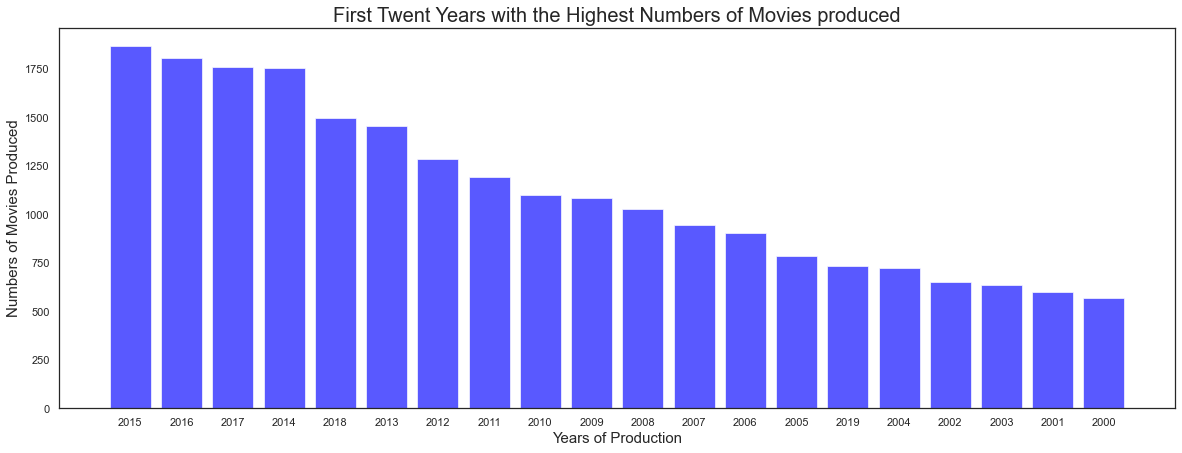

In [15]:
# Visualise the first twenty years with the highest numbers of movies produced
movies["year"] = movies["year"].astype('str')
movies_year_count = movies["year"].value_counts()
fig, ax = plt.subplots( figsize=(20,7))
# p = sns.barplot(x=movies_year_count.index[:20], y=movies_year_count.values[:20])
ax.bar(movies_year_count.index[:20], movies_year_count.values[:20],  facecolor='blue', alpha=0.65)
ax.set_xlabel("Years of Production", fontsize = 15)
ax.set_ylabel("Numbers of Movies Produced", fontsize = 15)
ax.set_title("First Twent Years with the Highest Numbers of Movies produced", fontsize = 20)
plt.show()

**CONCLUSION**

**Movies Produced per Year**
More than 1700 movies were produced in the year 2015, which is the year with the highest numbers of movies produced, followed by the year 2016 and 2017, which both have more than 1500 movies produced.

---

#### Movies Genres

Here we look at Movie genres that appears most in movies. This information will enable us understand the genres of movies produced most for the period the data was captured.

In [16]:
def tokenizer(data, col):
    """
        This function takes in a dataframe and a col, creates a new column to store the tokenized words
        in the inputed column, and returns a new dataframe.
    """
    df = data.copy()
    tokeniser = TreebankWordTokenizer()
    df['genre_tok'] = df[col].apply(tokeniser.tokenize)
    return df  

In [17]:
# Tokenized genre column
movies = tokenizer(movies, 'genres')
movies.head()

,movieId,title,genres,year,genre_tok
0,1,Toy Story 1995,Adventure Animation Children Comedy Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji 1995,Adventure Children Fantasy,1995,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men 1995,Comedy Romance,1995,"[Comedy, Romance]"
3,4,Waiting to Exhale 1995,Comedy Drama Romance,1995,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II 1995,Comedy,1995,[Comedy]


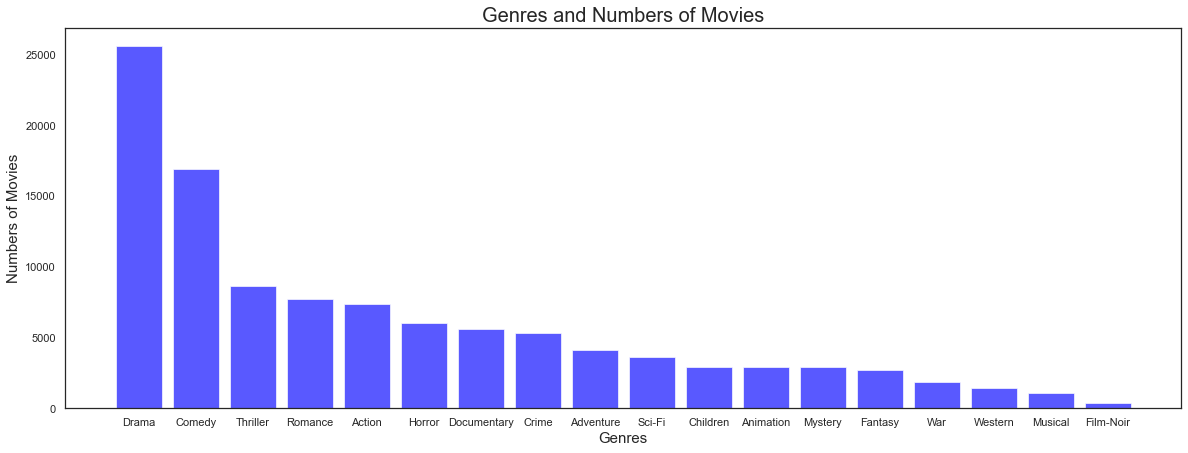

In [18]:
# Collect the tokenized genre in a list form
genres = movies['genre_tok'].values.tolist()
all_genres = []

# Merge the genre values
for index, genre in enumerate(genres):
    all_genres.extend(genre)

genre_df = pd.DataFrame({
    "genre":all_genres
})

genre_df = genre_df[genre_df['genre'].isin(['no', 'listed', 'genres', 'IMAX']) == False]

# Visualise the first twenty years with the highest numbers of movies produced
genre_count = genre_df["genre"].value_counts()
fig, ax = plt.subplots( figsize=(20,7))
ax.bar(genre_count.index, genre_count.values,  facecolor='Blue', alpha=0.65)
ax.set_xlabel("Genres", fontsize = 15)
ax.set_ylabel("Numbers of Movies", fontsize = 15)
ax.set_title("Genres and Numbers of Movies", fontsize = 20)
plt.show()

**CONCLUSION**

**Movie Genres**

Drama and Comedy are the most popular genres, followed by Thriller and Romance. We need to keep in mind that the movies could have multiple genres.

---

#### Top Movie Viewers
Here we look at the user_Ids that views the most of movies. This information Is useful in identifying top customers and their movie preference.

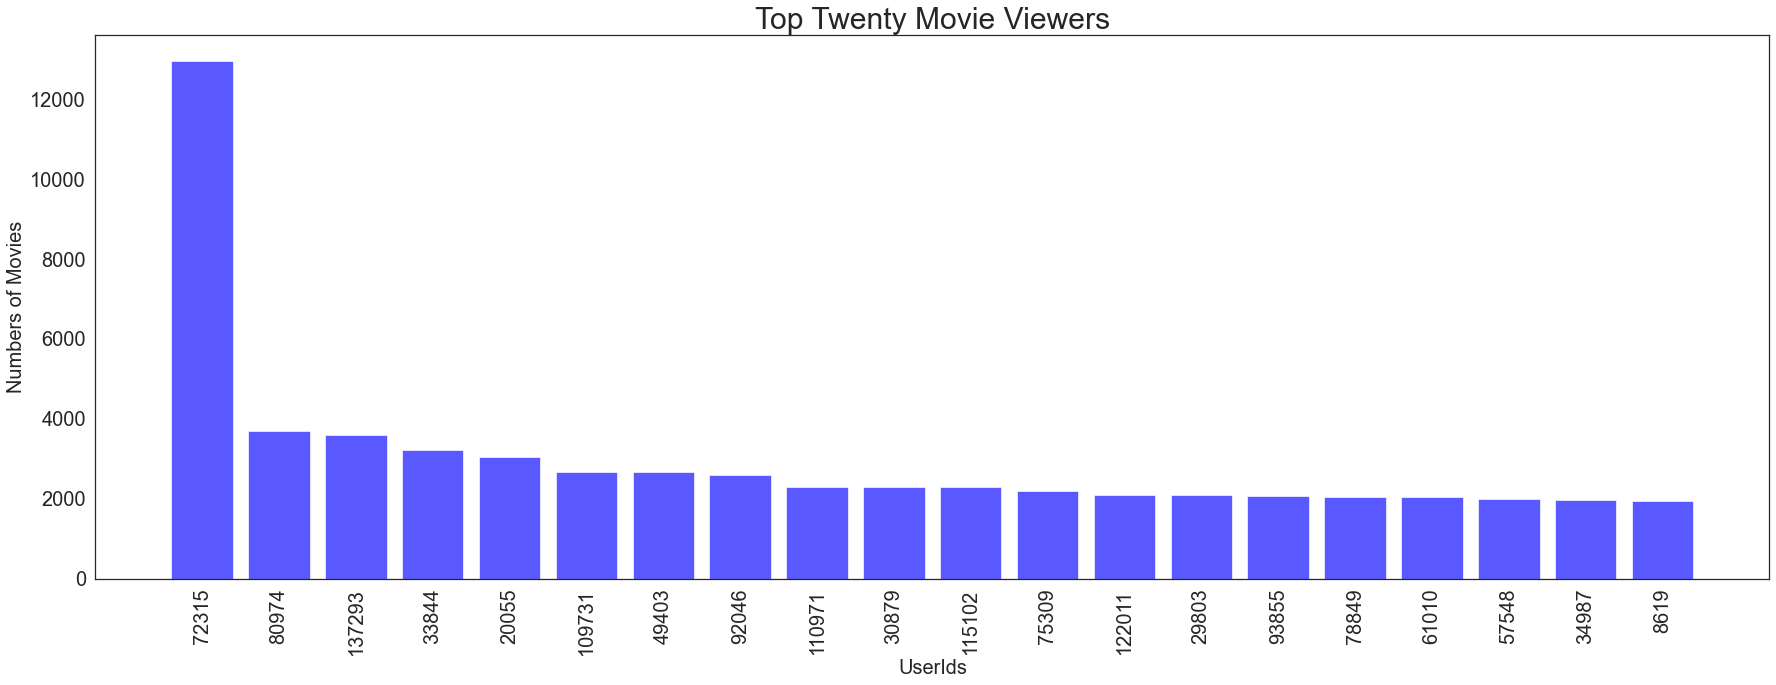

In [19]:
# Top movie viewers
train['userId'] = train['userId'].astype('str')
viewers = train['userId'].value_counts()
fig, ax = plt.subplots( figsize=(30,10))

ax.bar(viewers.index[:20], viewers.values[:20],  color='blue', alpha=0.65, width = 0.8)
ax.set_xlabel("UserIds", fontsize = 20)
ax.set_ylabel("Numbers of Movies", fontsize = 20)
ax.set_title("Top Twenty Movie Viewers", fontsize = 30)
plt.xticks(rotation=90, fontsize= 20)
plt.yticks( fontsize= 20)
plt.show()

**CONCLUSION**

**Top Movie Viewers**
UserId no 72315 was the top viewer followed by UserId no 80974 and UserId no 137293.

---




#### Highest Rated Movies

Here We look at the movies that have a rating of 4 and above. We have considered less than 4 to be average rating.
The train Data Includes `userId`, `movieId` , `rating` , `timestamp`. 

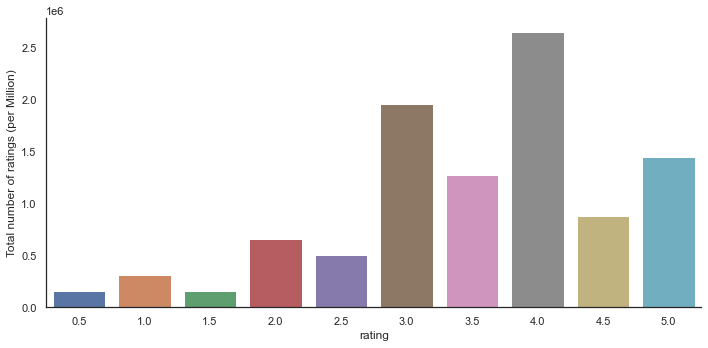

In [20]:
# Let's Visualise the Distribution of Rating in our Actual Train Data
with sns.axes_style('white'):
    t = sns.factorplot("rating", data=train, aspect=2.0, kind='count')
    t.set_ylabels("Total number of ratings (per Million)")
    

**CONCLUSION**

**Top rated categories Rated**
- 4.0 ,3.0 and 5.0 we're the highest rating for our Movies

----

In [21]:
# Create a Dataframe consisting of the users average rating the give per user and number of times they have rated movies
train_df = pd.DataFrame(train.groupby('userId')['rating'].agg('mean').reset_index())
train_df_2 = pd.DataFrame(train.groupby('userId')['rating'].count().reset_index())
# Merge the above to dataframe 
train_df = train_df.merge(train_df_2,on='userId',how = 'left')
# Rename the columns respectively
train_df.rename(columns={'rating_x':'avg_rating','rating_y':'number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
train_df = train_df.sort_values('number_of_movies', ascending = False)

# Show 5 observations 
train_df.head()

,userId,avg_rating,number_of_movies
131783,72315,3.092380,12952
141403,80974,3.277582,3680
41439,137293,3.192168,3588
89037,33844,2.583853,3208
73717,20055,3.179016,3050


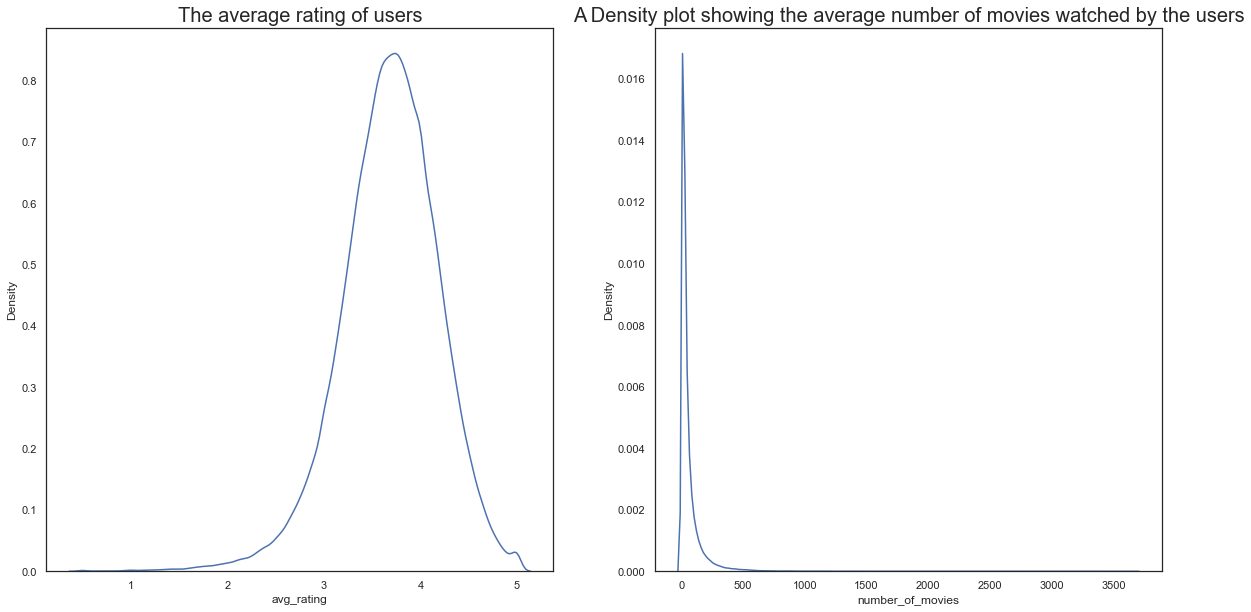

In [22]:
# Initialize the plot with set figure size
fig, ax = plt.subplots(1,2,figsize=(20, 10)) 

# Create a densityplot to visualise the density of the ratings per users
sns.kdeplot(ax=ax[0], x='avg_rating', data=train_df) 
ax[0].set_title("The average rating of users",fontsize = 20)

# Set the tick labels to appear in non-scientific form
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 

# Create a KDE plot of the rating the users 
sns.kdeplot(ax=ax[1], x='number_of_movies', data=train_df[1:]) 
ax[1].set_title("A Density plot showing the average number of movies watched by the users",fontsize = 20)
    
# Show density plot
plt.show()

The density plots explain the general trend or behaivior of the users. Two features that were observed displayed that most users(80%) give an average rating of 3.5 for a movie that the user has watched.

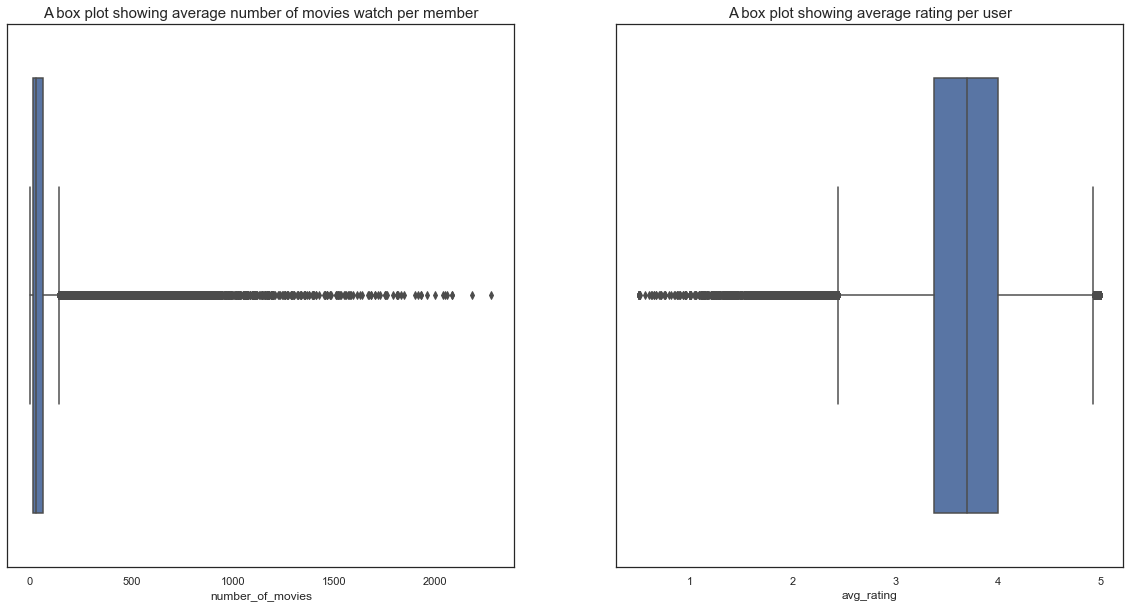

In [23]:
fig,ax = plt.subplots(1,2,figsize = (20,10))


sns.boxplot(ax =ax[0],x = train_df.iloc[10:,2])

ax[0].set_title("A box plot showing average number of movies watch per member", fontsize = 15)
sns.boxplot(ax = ax[1],x = train_df.iloc[10:,1] )

ax[1].set_title("A box plot showing average rating per user", fontsize = 15)
plt.show()

 Many users have watched less than 300 movies and that most users gave average rating greater than 3.5 for all the movies they have watched. There is also a high presence of outliers in our Data.

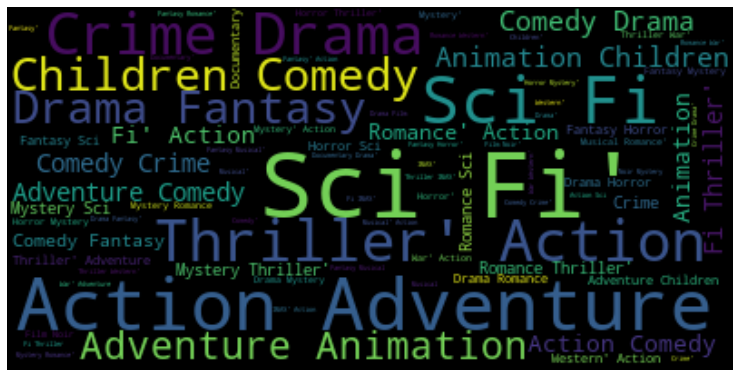

In [24]:
# Let us take a look at a world cloud of the different genres.
gen = movies['genres'].explode()
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

We can see from the wordcloud that Sci-Fi, Action, Adventure, Drama and Crime are the top watched Genres movies.

---

#### Avarage of the two Highest rated genres

In [25]:
# Function to get the genre ratings
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = train[train['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings
# Calculate the average rating of comedy and drama movies

genre_ratings = get_genre_ratings(train, movies, ['Comedy', 'Drama'], ['avg_comedy_rating', 'avg_drama_rating'])
print( "Number of records: ", len(genre_ratings))
genre_ratings.head()


Number of records:  162485


,avg_comedy_rating,avg_drama_rating
1,3.79,3.92
10,3.30,3.17
100,3.00,4.00
1000,3.10,3.88
10000,2.19,2.94


We can see that there are 162485 number of records ,and for each one, there is a rating for a comedy and drama movie.

---

#### The Bias of the Two highest Rated Genres

In order to have a more delimited subset of people to study, we are going to bias our grouping to only get ratings from those users that like either Comedy or Drama movies

In [26]:
# Function to get the biased dataset
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_comedy_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_drama_rating'] > score_limit_2)) | ((genre_ratings['avg_drama_rating'] < score_limit_1) & (genre_ratings['avg_comedy_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset
# Bias the dataset
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)
# Printing the resulting number of records & the head of the dataset
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  302


,index,avg_comedy_rating,avg_drama_rating
0,10,3.30,3.17
1,10000,2.19,2.94
2,100006,2.67,3.00
3,100009,3.32,3.12
4,100024,2.50,4.67


----

#### The Scatterplot of The Bias Dataset

We did a Visualization Analysis in order to obtain a good overview of the biased dataset and its characteristics

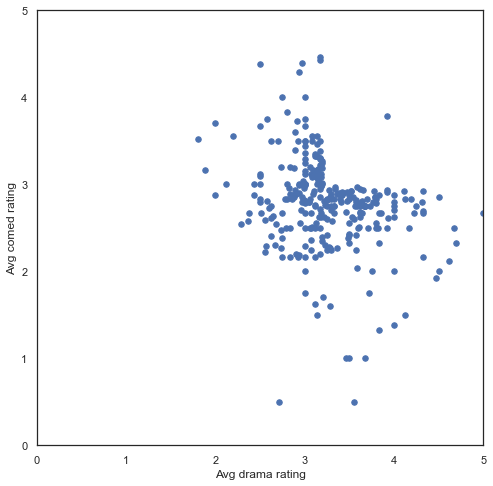

In [27]:
# Defining the scatterplot drawing function
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)
# Plot the scatterplot
draw_scatterplot(biased_dataset['avg_drama_rating'],'Avg drama rating', biased_dataset['avg_comedy_rating'], 'Avg comed rating')

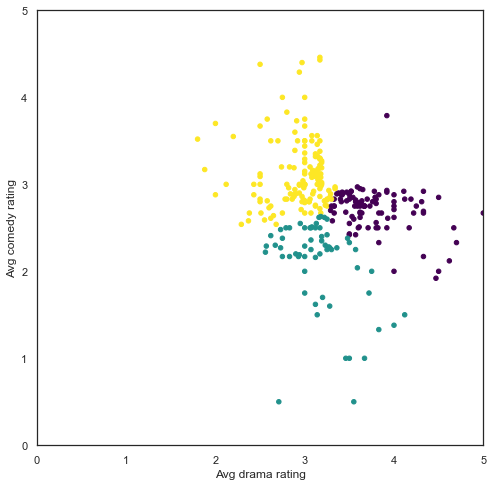

In [28]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_drama_rating','avg_comedy_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters= 3)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function

def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg drama rating')
    ax.set_ylabel('Avg comedy rating')
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    
    plt.scatter(clustered['avg_drama_rating'], clustered['avg_comedy_rating'], c=clustered['group'], s=20, cmap=cmap)
# Plot
draw_clusters(biased_dataset, predictions)


It is evident now that the Drama rating has started to come into play:

People who like Drama and Comedy belong to the yellow group.
People who like Drama but not Comedy belong to the green group.
People who like Comedy but not Drama belong to the purple group.

---

#### PCA before scalling

In [29]:
print("Computing PCA projection")
t0 = time()
train_pca = decomposition.PCA(n_components=2).fit_transform(train)
t1 = time()
print("Finished PCA projection in " + str(t1-t0) + "s.")

Computing PCA projection
Finished PCA projection in 15.548954486846924s.


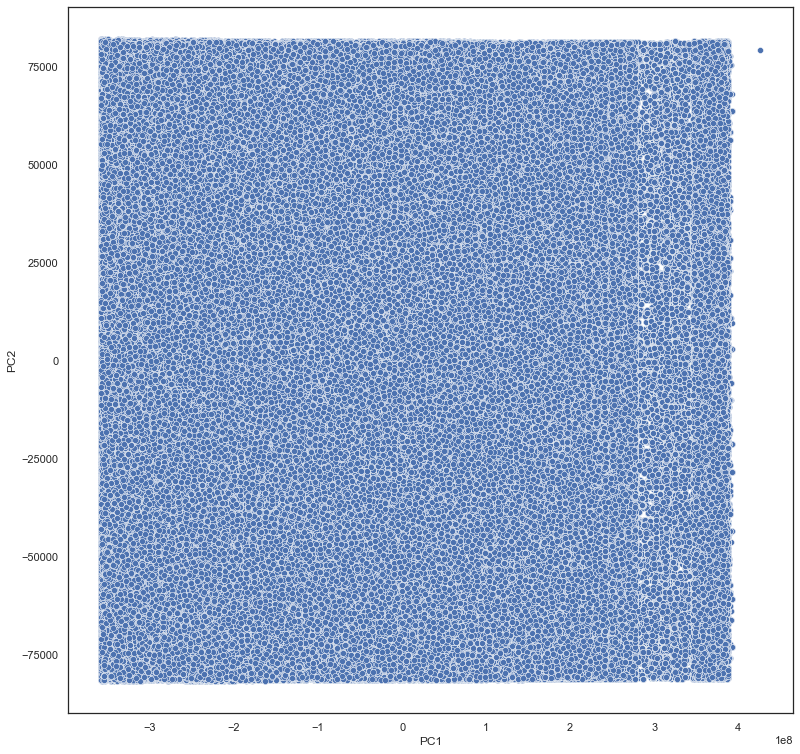

In [30]:
ax = sns.scatterplot(x=train_pca[:,0], y= train_pca[:,1],
                     sizes=(10, 200))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [31]:
#### Scalling the data

In [32]:
# declare the features to be all columns
features = [col for col in train.columns] 

In [33]:
# create scaler object

scaler = StandardScaler()
train_scaled = pd.read_csv('train.csv', encoding="UTF-8").dropna()
train_scaled[features] = preprocessing.scale(train_scaled[features])
train[features] = train_scaled[features].astype('float64')
X = scaler.fit_transform(train[features])

**Principal Component Analysis (PCA)** is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Text(0, 0.5, 'Cumulative explained variance')

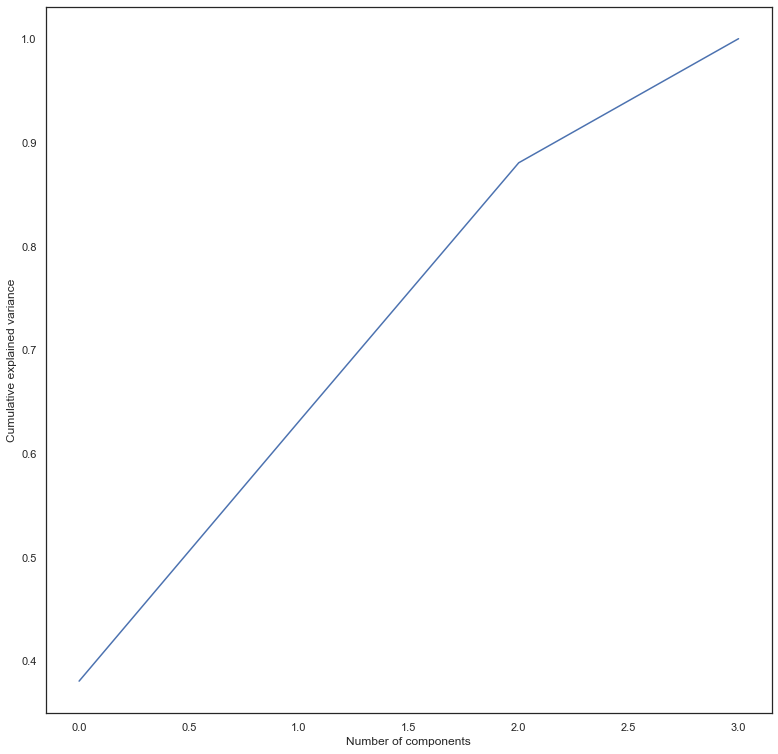

In [34]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(train_scaled[features])

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)

pca_df["rating"] = train["rating"]

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [35]:
pca_85 = PCA(.85)
pca_85.fit_transform(train[features])
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

88.0 % of variance explained by 3 components.


In [36]:
pca.explained_variance_ratio_[:3]

array([0.3802045 , 0.25060905, 0.24947369])

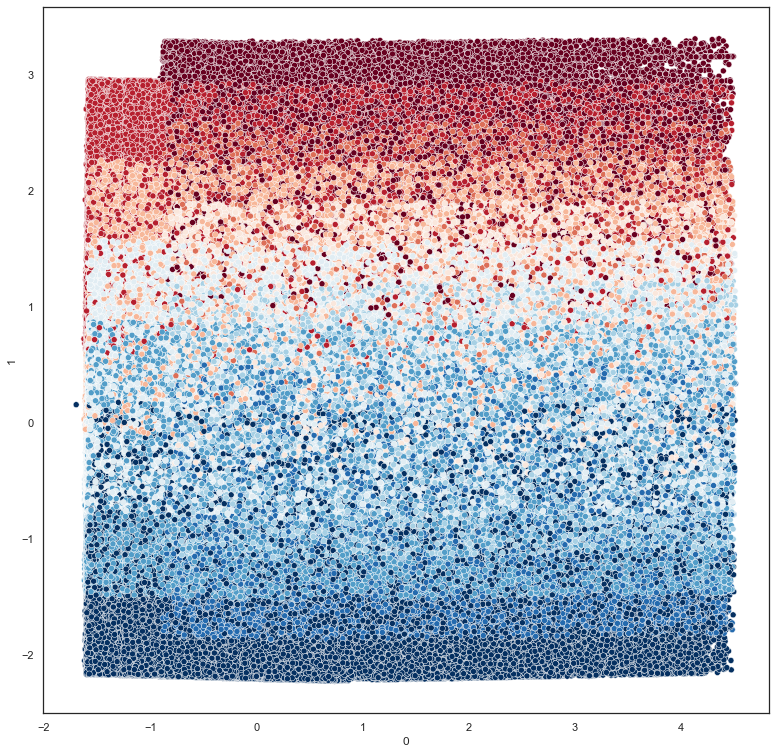

In [37]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],
                     hue="rating",
                     palette='RdBu',
                     data=pca_df,
                     legend=False)
plt.show()

In [38]:
train = train[:10000000]

#### DATA SCALING 

Scaling the target value is a good idea in regression modelling; scaling of the data makes it easy for a model to learn and understand the problem. Scaling of the data comes under the set of steps of data pre-processing when we are performing machine learning algorithms in the data set

In [39]:
scaler_mds = StandardScaler()
mds_train = scaler_mds.fit_transform(train.sample(frac=0.0001))

T-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

In [40]:
tsne = TSNE(3, n_jobs = -1, verbose = 2, perplexity = 10, learning_rate = 0.1)
tsne.fit(mds_train)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.018s...
[t-SNE] Computed neighbors for 1000 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.291323
[t-SNE] Computed conditional probabilities in 0.017s
[t-SNE] Iteration 50: error = 84.3026581, gradient norm = 0.0000245 (50 iterations in 0.422s)
[t-SNE] Iteration 100: error = 84.3026581, gradient norm = 0.0000035 (50 iterations in 0.356s)
[t-SNE] Iteration 150: error = 84.3026581, gradient norm = 0.0000031 (50 iterations in 0.398s)
[t-SNE] Iteration 200: error = 84.3026581, gradient norm = 0.0000060 (50 iterations in 0.346s)
[t-SNE] Iteration 250: error = 84.3026581, gradient norm = 0.0000156 (50 iterations in 0.280s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.302658
[t-SNE] Iteration 300: error = 4.5403123, gradient norm = 0.0000271 (50 iterations in 0.406s)
[t-SNE] Iteration 350: error = 4.5403104, gradient norm = 0.00007

TSNE(learning_rate=0.1, n_components=3, n_jobs=-1, perplexity=10, verbose=2)

### 3d plot of variance

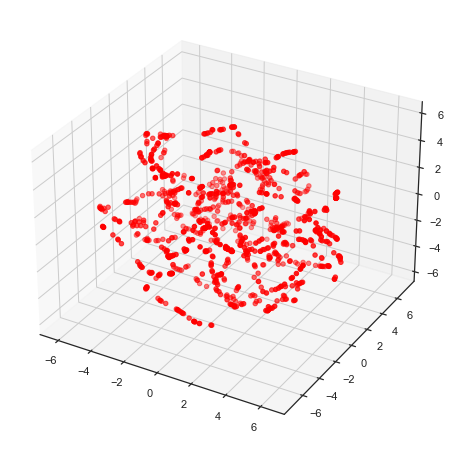

In [41]:
Axes3D

fig = plt.figure(figsize=(15, 8))

# Add 3D scatter plot
ax = fig.add_subplot(projection='3d')
ax.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], tsne.embedding_[:,2], color='Red')
plt.show()

<a id="five"></a>
## 4. Modelling




#### split test

In [73]:
# split data
# Load the 100k dataset
#train.drop('timestamp', axis=1, inplace=True)
train_subset = train[:100000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

SVD

The Singular Value Decomposition algorithm is a matrix factorization technique which reduces the number of features of a dataset and was popularized by Simon Funk during the Neflix Prize contest . In the matrix structure, each row represents a user and each column represents a movie. The matrix elements are ratings that are given to movies by users.

In [74]:
svd_test = SVD(n_epochs = 40, n_factors = 200, init_std_dev = 0.05, random_state=42)
svd_test.fit(trainset)
predictions = svd_test.test(testset)
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9176


In [75]:
svd = SVD()
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9176


**NormalPredictor**

The Normal Predictor algorithm predicts a random rating for each movie based on the distribution of the training set, which is assumed to be normal.

In [76]:
np_test = NormalPredictor()
np_test.fit(trainset)
predictions = np_test.test(testset)
# Calculate RMSE
np_rmse = accuracy.rmse(predictions)

RMSE: 1.3658


**BaselineOnly**

The Baseline Only algorithm predicts the baseline estimate for a given user and movie. A baseline is calculated using either Stochastic Gradient Descent (SGD) or Alternating Least Squares (ALS).

In [77]:
bsl_options = {'method': 'sgd','n_epochs': 40}
blo_test = BaselineOnly(bsl_options=bsl_options)
blo_test.fit(trainset)
predictions = blo_test.test(testset)
# Calculate RMSE
blo_rmse = accuracy.rmse(predictions)

Estimating biases using sgd...
RMSE: 0.9174


**Non-negative Matrix Factotization**

NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. The optimization procedure is a (regularized) stochastic gradient descent with a specific choice of step size that ensures non-negativity of factors, provided that their initial values are also positive.

In [78]:
nmf_test = NMF()
nmf_test.fit(trainset)
predictions = nmf_test.test(testset)
# Calculate RMSE
nmf_rmse = accuracy.rmse(predictions)

RMSE: 1.1126


**Content-Based Filtering Recommendation**

The Content-Based Recommendation system computes similarity between movies based on movie genres using the selected movie as a baseline. Using this type of movie recommendation system, we require the title of the movie as input, but our sim_matrix is based on the index of each movie. Therefore, to build this, we need to convert movie title into movie index and movie index into movie title. Let's create functions which operate those functions.

In [79]:
# the function to convert from index to title_year
def get_title_year_from_index(index):

      return movies[movies.index == index]['title_year'].values[0]

# the function to convert from title to index
def get_index_from_title(title):

      return movies[movies.title == title].index.values[0]

**Applying the 'Did you mean?' Algorithm (Levenshtein Distance)**
We often misspell titles of movies when we use movie recommending system. When we use Google to search movies, if we misspell the title of the movie, we see that Google asks us, 'Did you mean...?'.

Let's create the similar function to correct misspelled title in order to make the system work easily. We apply Levenshtein Distance in order to implement 'Did you mean...?' algorithm. fuzzywuzzy library in Python provides fuzz class for the Levenshtein Distance.

In [80]:
# create a function to find the closest title
def matching_score(a,b):

      return fuzz.ratio(a, b)

fuzz.ratio(a,b) calculates the Levenshtein Distance between a and b, and return the score for the distance. If the two words, a and b, are exactly the same, the score becomes 100. As the distance between the words increases, the score falls.

In [81]:
# the function to convert from index to title
def get_title_from_index(index):

      return movies[movies.index == index]['title'].values[0]

In [82]:
# the function to return the most similar title to the words a user types
def find_closest_title(title):

    leven_scores = list(enumerate(movies['title'].apply(matching_score, b=title)))
    sorted_leven_scores = sorted(leven_scores, key=lambda x: x[1], reverse=True)
    closest_title = get_title_from_index(sorted_leven_scores[0][0])
    distance_score = sorted_leven_scores[0][1]

    return closest_title, distance_score

The function find_closest_title() is supposed to return the most similar title to the words a user types. Without this, the recommending system only works when the movie title a user types is exactly the same as the movie title the system has.

** Building the Content-Based Recommending System **

In [99]:
def contents_based_recommender(movie_user_likes, how_many):
    # Get closest Title & Dist. score from Inputed Title
    closest_title, distance_score = find_closest_title(movie_user_likes)

    if distance_score == 100:
        # Get movie idex using declared fuunction
        movie_index = get_index_from_title(closest_title)
        # Apply index to similarity matrix and obtain list of similar movie index
        movie_list = list(enumerate(sim_matrix[int(movie_index)]))
        # Return a list of similar movies
        similar_movies = list(filter(lambda x:x[0] != int(movie_index), 
                                     sorted(movie_list, key=lambda x:x[1], reverse=True))) 
        print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')
        
        for i, s in similar_movies[: how_many]: print(get_title_year_from_index(i))
    
    else:
        print('Did you mean '+'\033[1m'+str(closest_title)+'\033[0m'+'?','\n')
        movie_index = get_index_from_title(closest_title)
        movie_list = list(enumerate(sim_matrix[int(movie_index)]))
        similar_movies = list(filter(lambda x:x[0] != int(movie_index), 
                                     sorted(movie_list,key=lambda x:x[1], reverse=True)))
        print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')
        
        for i,s in similar_movies[:how_many]: print(get_title_year_from_index(i))

The recommending system returns the list of movies similar to the movie a user likes. It finds and recommends movies even if the user misspell the tile of the movie he or she likes. If the user misspell the title, the system finds the most similar title to the words the user types and recommends movies based on the movie it found alternatively.

** Collaborative-Based Filtering Recommender **

Collaborative methods for recommender systems are methods that are based solely on the past interactions recorded between users and items in order to produce new recommendations. These methods do not require item meta-data like their content-based counterparts. This makes them less memory intensive which is a major plus since our dataset is so huge.

In [86]:
"""
SETUP TRAIN & VALIDATION DATASET
"""

# We split our Dataset to enable us validate here after modeling.
print('initial shape of TRAIN: ', train.shape)
train_data = train.iloc[:int(train.shape[0]*0.0005)]   # <--- Used if Computing capcity is an Issue
# train_data = train_df_act                                          # <--- Alternate Option for Full Data Set

val_data = test.iloc[int(test.shape[0]*0.00001):]
print('Final shape of TRAIN Dataset: ', train.shape)
print('Final shape of Validation Dataset: ', val_data.shape)

initial shape of TRAIN:  (10000000, 4)
Final shape of TRAIN Dataset:  (10000000, 4)
Final shape of Validation Dataset:  (4999969, 2)


In [87]:
# Establishing Range of Ratings
min_rating = train.rating.min()
max_rating = train.rating.max()
print(f'The RATING ranges between {min_rating} and {max_rating}')

The RATING ranges between -2.858662252974858 and 1.3821238643339047


In [100]:
'''Recall, We've imported SURPRISE at our Import section '''
from surprise.model_selection import train_test_split

# This is to specify how to read the data frame.
reader = Reader(rating_scale=(min_rating, max_rating))     # i.e 0.5 & 5 Respectively; SEE EDA

# This creates the train-data from our dataframe
data = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)

# Get Train_Valdiation Data Set
trainset, valset = train_test_split(data, test_size=0.25, random_state=42)

There are 2 collaborative Based filtering methods:
MEMORY BASED: We will investigate 2 two memory based methods: User-user and item-item. The main characteristics of user-user and item-item approaches is that they use only information from the user-item interaction matrix and they assume no model to produce new recommendations.
MODEL BASED: Model based collaborative approaches only rely on user-item interactions information and assume a latent model supposed to explain these interactions. For example, matrix factorisation algorithms consists in decomposing the huge and sparse user-item interaction matrix into a product of two smaller and dense matrices: a user-factor matrix (containing users representations) that multiplies a factor-item matrix (containing items representations).

User-User Collaborative Based Filtering
This algorithm, looks at the pattern of interets of similar users, uses the choices and preference of similar users to suggest new items.

In order to make a new recommendation to a user, the user-user method roughly tries to identify users with the most similar interactions profile (nearest neighbours) in order to suggest movies that are the most popular among these neighbours (and that are “new” to our user). This method is said to be user-centred as it represents users based on their interactions with items and evaluates distances between users.

In [ ]:
# Compute similarities between users using cosine distance
sim_options = {"name": "cosine",
               "user_based": True}  

# Evaluate the model 
user = npl_test(sim_options=sim_options)
cv = cross_validate(user, data, cv=2, measures=['RMSE'], verbose=True)

Observations and limitations

Using user based collaborative system gives us a RMSE score of approx. 1.09 (based on a 0.1% sample of the train data)
Even though user based collaborative based techniques are powerful, there are few challenges.Scalability and sparsity are the primary issues.

Scalability: In a system where there are many new users, i.e. users with low records of ratings, it is computationally expensive to train the model. These problems arise with Nearest Neighbour algorithms in User based collaborative filtering where these algorithms require computations that grow simultaneously with the increasing numbers of users and items. (Cold start), in a no model based system we get over this problem by recommending the most rated movies

Data Sparsity: Sparsity arises in a system when even the most active users have rated only a marginal number of available items. For example, these users may have experience with even less than 1% of available items making the correlation coefficient less reliable

Another concern is that user profiles change quickly and the entire system model will have to be recomputed which is both time and computationally expensive

If a recommender system experiences any of the described issues, the algorithm's performance decreases; i.e. the system does not recommend the user relevant items.

Item-Item Collaborative Based Filtering
To tackle the issues with user-based collaborative based techniques, item-based collaborative techniques analyze the user-item matrix and identify relationships between different items. The item-based recommendation system then makes recommendations based on the discovered similarities amongst the items. This method is more stable compared to user based collaborative filtering because the average item has a lot more ratings than the average user. So an individual rating doesn’t impact as much.

The idea of item-item method is to find movies similar to the ones the user already “positively” interacted with. Two items are considered to be similar if most of the users that have interacted with both of them did it in a similar way. This method is said to be “item-centred” as it represents items based on interactions users had with them and evaluates distances between those items.

####  Model Based Collaborative  Filtering

Model based collaborative approaches only rely on user-item interactions information and assume a latent model supposed to explain these interactions. For example, matrix factorisation algorithms consists in decomposing the huge and sparse user-item interaction matrix into a product of two smaller and dense matrices: a user-factor matrix (containing users representations) that multiplies a factor-item matrix (containing items representations).

Matrix factorization algorithms work by decomposing the user-movie interaction matrix into the product of two lower dimensionality rectangular matrices, say U and M. The decomposition is done in such a way that the product results in almost similar values to the user-movie interaction matrix. Here, U represents the user matrix, M represents the movie matrix, n is the number of users, and m is the number of movies.
<img src="https://miro.medium.com/max/1400/1*NXi0LB3kgjXI9meTYB1Raw.png" width=50%/> 
Each row of the user matrix represents a user and each column of the movie matrix represents a movie.

#####  Applying Matrix Factorization Considering Several Algorithms

**1- SlopeOne Algorithm**

Slope One is a family of algorithms used for collaborative filtering. It is the simplest form of non-trivial item-based collaborative filtering based on ratings

Their simplicity makes it especially easy to implement them efficiently while their accuracy is often on par with more complicated and computationally expensive algorithms

<a id="six"></a>
## 5. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

We built and tested four different collaborative filtering models and compared their performance using a statistical measure known as the root mean squared error (RMSE), which determines the average squared difference between the estimated values and the actual value. A low RMSE value indicates high model accuracy.



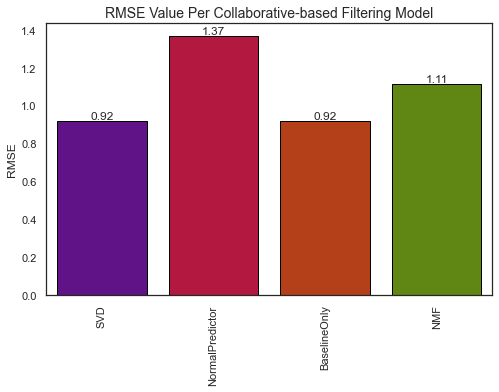

In [95]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SVD','NormalPredictor','BaselineOnly','NMF']
rmse_y = [svd_rmse,np_rmse,blo_rmse,nmf_rmse]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='brg',edgecolor='black')
plt.title('RMSE Value Per Collaborative-based Filtering Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

**Cross Validation**

Cross validation is a technique used to test the accuracy of a model's prediction on unseen data (validation sets). This is important because it can assist in picking up issues such as over/underfitting and selection bias. We used the K-fold technique to perform cross validation on our two best perfoming models, i.e. SVD and BaselineOnly.

In [96]:
svd_test = SVD(n_epochs = 40, n_factors = 200, init_std_dev = 0.05, random_state=42)
# Run 5-fold cross-validation and print results
a = cross_validate(svd_test, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9766  0.9943  1.0004  1.0015  0.9881  0.9922  0.0091  
Fit time          0.88    0.92    0.92    1.11    1.00    0.97    0.08    
Test time         0.02    0.01    0.01    0.02    0.01    0.01    0.00    


In [97]:
bsl_options = {'method': 'sgd','n_epochs': 10}
blo_test = BaselineOnly(bsl_options=bsl_options)
# Run 5-fold cross-validation and print results
b = cross_validate(blo_test, data, measures=['RMSE'], cv=5, verbose=True)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Evaluating RMSE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9965  0.9958  1.0248  0.9665  1.0095  0.9986  0.0192  
Fit time          0.02    0.01    0.02    0.01    0.03    0.02    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


After performing cross validation we find SVD as the best model , since it have lower RMSE as compared to baseline algorathm.

<a id="seven"></a>
## 6. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

Hyperparameter tuning is the process by which a set of ideal hyperparameters are chosen for a model. A hyperparameter is a parameter for which the value is set manually and tuned to control the algorithm's learning process. We tested multiple parameters for our best performing model (i.e. SVD).



In [98]:
rating_scale = Reader(rating_scale=(0.5, 5))
train_df = Dataset.load_from_df(train.drop('timestamp', axis=1), rating_scale)

# Training and validation set split for hypertuning
train_set, val_set = train_test_split(train_df,
                                      test_size=0.008,
                                      random_state=42)

# Modelling of the SVD hypertuning
svd_algo_hyper = SVD(n_factors=160, 
                     lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=20,
                     init_std_dev=0.01)
svd_algo_hyper.fit(train_set)

# Predicting on the validation set
svd_hyper_predictions = svd_algo_hyper.test(val_set)

# Convert the predictions to dataframe
#test = pd.DataFrame(predictions)
accuracy.rmse(svd_hyper_predictions)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'SVD_Tuned'}
metrics = {'RMSE': accuracy.rmse(svd_hyper_predictions)}

# # Log the parameters and results for the SVD tuned model
# experiment.log_parameters(params)
# experiment.log_parameters(metrics)
# # End the experiment for the SVD tuned experiment
# experiment.end()

RMSE: 1.0975
RMSE: 1.0975


**CONCLUSION**

In this project, we succeeded in building an unsupervised machine learning model that is able to recommend movies based on content-based or collaborative filtering and is capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences. Our top performing model is SVD  which have a root mean squared error (RMSE) of 0.78 after hyperparameter tuning.

The singular value decomposition (SVD) algorithm is a baseline approach to recommender systems, as it has a broad range of applications including dimensionality reduction, solving linear inverse problems, and data fitting. The SVD algorithm generally performs better on large datasets compared to some other models as it decomposes a matrix into constituent arrays of feature vectors corresponding to each row and each column.

## COMET

In [172]:
# Saving each metric to add to a dictionary for logging

RMSE =  np_test.test(testset)
#fit = nmf_test.test(testset)
# Calculate RMSE
RMSE = accuracy.rmse(predictions)

RMSE: 1.4538


In [173]:
params = {"random_state": 42,
          "model_type": "np_test",
          "scaler": "standard scaler",
          
          "stratify": True
          }
metrics = {"RMSE": RMSE,
           
           "test": RMSE
           }

In [174]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [175]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/lehonga/gm6/f835837025a0424190316886ef63cc6f
COMET INFO:   Metrics:
COMET INFO:     RMSE : 1.45381211570231
COMET INFO:     test : 1.45381211570231
COMET INFO:   Parameters:
COMET INFO:     model_type   : np_test
COMET INFO:     random_state : 42
COMET INFO:     scaler       : standard scaler
COMET INFO:     stratify     : True
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO:

In [176]:
experiment.display()

In [ ]:
# evaluate one or more ML models
# Train model on whole dataset
reader = Reader(rating_scale=(train['rating'].min(), train['rating'].max()))
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 10, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset)

# Create Kaggle submission file
predictions = []
for i, row in test.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test['Id'] = test['userId'].map(str) +'_'+ test['movieId'].map(str)
results = pd.DataFrame({"Id":test['Id'],"rating": predictions})
results.to_csv("Movie6_sub.csv", index=False)

### References

https://www.packt.com/recommending-movies-scale-python/

https://www.youtube.com/watch?v=1xtrIEwY_zY

https://towardsdatascience.com/content-based-recommender-systems-28a1dbd858f5

https://www.analyticsvidhya.com/blog/2020/11/create-your-own-movie-movie-recommendation-system/
